In [2]:
#NOWAK STRONA 82 !! metoda polega na poszukiwaniu zbioru vektorów własnych (tj. macierz T) macierzy kowariancji Cx
# modelowanych, skolerowanych zmiennych losowych Xi
# dzięki temu możemy wylosować całkowicie nieskolerowane zmienne losowe Yi i przemnożyć Y * T by otrzymać losowy
# zestaw odpowiednio skoleoranych zmiennych Xi które stanowią wartości wsodowe punktów siatki pola losowego
import numpy as np
from numpy import linalg as LA
import math

In [27]:
sigmaXi=3.0 #odchylenie stand. każdej zmiennej Xi
meanXi=10.0 #średnia zmiennych Xi
ix=10 #liczba zmiennych losowych na kierunku X
iy=3 #liczba zmiennych losowych na kierunku Y
Cx=np.zeros((ix*iy,ix*iy)) #Cx to macierz kowariancji zmiennych losowych Xi
LcX=11 #długość belki (długość korelacji)
LcY=4 #szerokość belki (płyty);(szerokość korelacji)
deltaX=LcX/(ix+1) #lag distance X - odległości między zmiennymi wzdłuż mostu
deltaY=LcY/(iy+1) #lag distance Y - odległości poprzeczne
l_realiz = 1#żądana liczba realizacji
print("odleglosci horyz =",deltaX)
ro=np.eye(ix*iy)
print("'pusta' macierz współczynników korelacji =")
print(ro)

odleglosci horyz = 1.0
'pusta' macierz współczynników korelacji =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 

In [28]:
#1. budowa miecierzy współrzędnych punktów zmiennych losowych
W=np.zeros((2, ix*iy))
#print(W)
k=-1
kk=-1
#for aa in range (2):
#    kk=-1
for bb in range(ix*iy):
    k+=1
    if k==ix:
        k=0
    if bb%ix==0:
        kk+=1
    W[0,bb]=k
    W[1,bb]=kk
print(W)

#2. budowa miecierzy odległości O
O=np.zeros((ix*iy, ix*iy))
for a in range(ix*iy):
    for b in range(ix*iy):
        O[a,b]=np.exp(-(math.sqrt((W[0,a]-W[0,b])**2+(W[1,a]-W[1,b])**2))*deltaX/LcX) #tu już od razu przerobiłem na ro
print(O)

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 0. 1. 2. 3.
  4. 5. 6. 7. 8. 9.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2.]]
[[1.         0.91310072 0.83375292 0.76130039 0.69514393 0.63473642
  0.57957828 0.52921334 0.48322508 0.44123317 0.91310072 0.87935652
  0.81605061 0.75015173 0.68740765 0.62904831 0.57523397 0.52580527
  0.48049785 0.43901714 0.83375292 0.81605061 0.77326788 0.7205234
  0.66593859 0.61289574 0.56272762 0.5159073  0.47252928 0.43251408]
 [0.91310072 1.         0.91310072 0.83375292 0.76130039 0.69514393
  0.63473642 0.57957828 0.52921334 0.48322508 0.87935652 0.91310072
  0.87935652 0.81605061 0.75015173 0.68740765 0.62904831 0.57523397
  0.52580527 0.48049785 0.81605061 0.83375292 0.81605061 0.77326788
  0.7205234  0.66593859 0.61289574 0.56272762 0.5159073  0.47252928]
 [0.83375292 0.91310072 1.         0.91310072 0.83375292 0.76130039
  0.69514393 0.63473642 0.57957828 0.52921334 0.81605061 0.8

In [29]:
ro=np.eye(ix*iy)
ro=O #to nie jest 0 tylko litera "O" !
Cx=ro*sigmaXi*sigmaXi
print(Cx)

[[9.         8.21790645 7.50377626 6.85170348 6.25629536 5.71262777
  5.21620451 4.76292007 4.34902573 3.97109851 8.21790645 7.91420866
  7.34445547 6.75136556 6.18666886 5.66143475 5.17710575 4.73224742
  4.32448066 3.95115423 7.50377626 7.34445547 6.95941096 6.48471059
  5.99344734 5.51606167 5.06454855 4.64316574 4.25276351 3.89262669]
 [8.21790645 9.         8.21790645 7.50377626 6.85170348 6.25629536
  5.71262777 5.21620451 4.76292007 4.34902573 7.91420866 8.21790645
  7.91420866 7.34445547 6.75136556 6.18666886 5.66143475 5.17710575
  4.73224742 4.32448066 7.34445547 7.50377626 7.34445547 6.95941096
  6.48471059 5.99344734 5.51606167 5.06454855 4.64316574 4.25276351]
 [7.50377626 8.21790645 9.         8.21790645 7.50377626 6.85170348
  6.25629536 5.71262777 5.21620451 4.76292007 7.34445547 7.91420866
  8.21790645 7.91420866 7.34445547 6.75136556 6.18666886 5.66143475
  5.17710575 4.73224742 6.95941096 7.34445547 7.50377626 7.34445547
  6.95941096 6.48471059 5.99344734 5.51606167 

In [30]:
eigenvalues, eigenvectors = np.linalg.eig(Cx)
T=-eigenvectors
#print("T=",T)
Tt=np.transpose(T)
#print("Transposed T =",Tt)

In [31]:
MeanXi = np.full((ix*iy, 1), meanXi)
#print(MeanXi)
MeanYi=np.matmul(Tt, MeanXi)
#print(MeanYi)

In [32]:
from numpy.linalg import multi_dot
Cy=multi_dot([Tt, Cx, T])
print(Cy)

[[ 1.99119687e+02  2.50705825e-14  5.72973960e-14  9.73960171e-15
   1.96861664e-15  1.70739900e-14 -6.09086103e-15  3.76773158e-14
  -2.90999725e-14  1.12679210e-14 -7.04255144e-14  5.45053742e-14
   3.48687560e-14  2.20834359e-15  2.90572015e-14 -2.91402539e-14
   3.09167484e-15  1.65488461e-14 -3.70334354e-14  4.39966118e-15
   3.34319411e-14 -2.20670615e-15 -5.43977686e-14 -2.16321098e-14
   3.73066737e-15  1.83470563e-15 -1.70812916e-14 -2.11730057e-14
  -8.36951941e-15  2.26027287e-15]
 [ 3.41966283e-14  3.18718654e+01  2.38995597e-15  1.30162902e-15
   7.89193665e-15 -3.69778658e-15 -1.04058121e-14  3.45765785e-15
  -3.15684387e-15 -4.10841754e-15  2.22657134e-15  5.45574733e-15
   4.75669089e-15 -6.97795133e-15 -3.83462122e-16  4.32395981e-15
   2.71191559e-15  5.11651456e-15 -1.13200623e-14 -2.94508420e-15
  -2.31498071e-15 -3.45017275e-15 -4.67292047e-15  4.15519178e-15
  -2.57082774e-15 -2.36978478e-15  1.46220453e-15 -5.50027553e-15
   3.12976713e-15 -2.03722005e-15]
 [ 4.6

In [33]:
sigmaYi=np.sqrt(Cy)
print(sigmaYi)

[[1.41109775e+01 1.58336927e-07 2.39368745e-07 9.86894205e-08
  4.43690956e-08 1.30667479e-07            nan 1.94106455e-07
             nan 1.06150464e-07            nan 2.33463861e-07
  1.86731776e-07 4.69930164e-08 1.70461730e-07            nan
  5.56028312e-08 1.28642318e-07            nan 6.63299418e-08
  1.82844035e-07            nan            nan            nan
  6.10791894e-08 4.28334639e-08            nan            nan
             nan 4.75423272e-08]
 [1.84923304e-07 5.64551728e+00 4.88871759e-08 3.60780961e-08
  8.88365727e-08            nan            nan 5.88018524e-08
             nan            nan 4.71865589e-08 7.38630309e-08
  6.89687675e-08            nan            nan 6.57568233e-08
  5.20760558e-08 7.15298159e-08            nan            nan
             nan            nan            nan 6.44607771e-08
             nan            nan 3.82387831e-08            nan
  5.59443217e-08            nan]
 [2.16004105e-07 5.54365300e-08 3.02008576e+00 7.16375455e-08
    

In [34]:
Yi=np.zeros((ix*iy, 1))
#Yi

In [35]:
Xiall=np.zeros((ix*iy, l_realiz))
for vv in range(l_realiz):
    for ww in range(ix*iy):
        A=np.random.normal(MeanYi[ww],np.sqrt(Cy[ww,ww]),size=(1))
        Yi[ww,0]=A
    Xi=np.matmul(T, Yi)
    Xiall[0:ix*iy,vv:vv+1] = Xi
print(Xiall)

[[10.61582577]
 [ 9.28689224]
 [ 9.80654962]
 [11.19156742]
 [10.18453761]
 [10.35774052]
 [12.51615506]
 [11.46276636]
 [12.68739377]
 [13.5413075 ]
 [13.30785762]
 [11.65098493]
 [12.62925465]
 [11.24837977]
 [10.75730929]
 [11.0126079 ]
 [ 9.96099354]
 [11.64576792]
 [11.46603638]
 [12.02285588]
 [12.48364687]
 [12.02236484]
 [10.98689201]
 [11.8310319 ]
 [10.72705642]
 [10.42106901]
 [10.00928164]
 [10.14574728]
 [10.4063019 ]
 [13.13580644]]


In [36]:
P=Xiall.reshape((ix,iy))
print(P)

[[10.61582577  9.28689224  9.80654962]
 [11.19156742 10.18453761 10.35774052]
 [12.51615506 11.46276636 12.68739377]
 [13.5413075  13.30785762 11.65098493]
 [12.62925465 11.24837977 10.75730929]
 [11.0126079   9.96099354 11.64576792]
 [11.46603638 12.02285588 12.48364687]
 [12.02236484 10.98689201 11.8310319 ]
 [10.72705642 10.42106901 10.00928164]
 [10.14574728 10.4063019  13.13580644]]


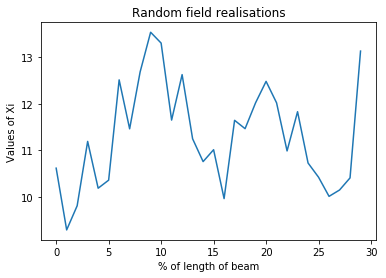

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.plot(Xiall)
plt.xlabel('% of length of beam')
plt.ylabel('Values of Xi')
plt.title('Random field realisations')
plt.show()

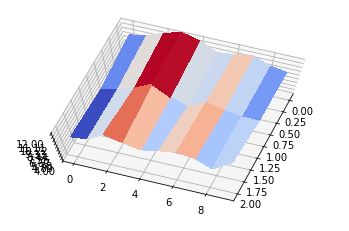

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0, iy, 1)
Y = np.arange(0, ix, 1)
X, Y = np.meshgrid(X, Y)

Z=P
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(4, 12)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(75, 20)
plt.show()